<a href="https://colab.research.google.com/github/divijsingh02/Analysing-student-performance/blob/main/Analysing_student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries and dataset


In [1]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('StudentsPerformance.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Encoding the variables

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), list(range(5)))], remainder='passthrough')
X = np.array(ct.fit_transform(X))

##### Spliting dataset


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

Scaling the values

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Implementing neural network model 


In [5]:
ann = tf.keras.models.Sequential()

In [6]:
ann.add(tf.keras.layers.Dense(units=2048, activation='relu'))
ann.add(tf.keras.layers.Dense(units=2048, activation='relu'))
ann.add(tf.keras.layers.Dense(units=2048, activation='relu'))
ann.add(tf.keras.layers.Dense(units=2048, activation='relu'))
ann.add(tf.keras.layers.Dense(units=2048, activation='relu'))
ann.add(tf.keras.layers.Dense(units=2048, activation='relu'))
ann.add(tf.keras.layers.Dense(units=2048, activation='relu'))
ann.add(tf.keras.layers.Dense(units=2048, activation='relu'))






In [7]:
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [8]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

  Training the model with batch size =128 and epoch = 50
  
  Best result achieved by this model

In [9]:
ann.fit(X_train, y_train, batch_size = 128, epochs = 50 ,validation_split=0.1 )  #8 , 200

Epoch 1/50
6/6 [==============================] - 4s 95ms/step - loss: 14428.2113 - mean_squared_error: 14428.2113 - val_loss: 4999.4854 - val_mean_squared_error: 4999.4854
Epoch 2/50
6/6 [==============================] - 0s 23ms/step - loss: 4970.8186 - mean_squared_error: 4970.8186 - val_loss: 4638.5234 - val_mean_squared_error: 4638.5234
Epoch 3/50
6/6 [==============================] - 0s 22ms/step - loss: 3488.2695 - mean_squared_error: 3488.2695 - val_loss: 737.5457 - val_mean_squared_error: 737.5457
Epoch 4/50
6/6 [==============================] - 0s 20ms/step - loss: 751.6541 - mean_squared_error: 751.6541 - val_loss: 1242.9326 - val_mean_squared_error: 1242.9326
Epoch 5/50
6/6 [==============================] - 0s 19ms/step - loss: 778.4428 - mean_squared_error: 778.4428 - val_loss: 553.6439 - val_mean_squared_error: 553.6439
Epoch 6/50
6/6 [==============================] - 0s 18ms/step - loss: 344.3437 - mean_squared_error: 344.3437 - val_loss: 330.5439 - val_mean_squared_

Mean squared loss = 2.45 which is quite less hence our model works great
It shows that there is a great correlation between reading score and the rest of the features of the data



**Here , I have compared predicted values with test values**

Mean absolute error = 3.355 , Which far more impressive than I expected

In [10]:
y_pred = ann.predict(X_test)
test_mean_sq_error=0
n=len(y_pred)
for i in range(n):

  if y_pred[i]-int(y_pred[i])>=0.5:
    y_pred[i]=int(y_pred[i])+1
  else:
    y_pred[i]=int(y_pred[i])
for i in range(n):
  test_mean_sq_error+=abs(y_pred[i]-y_test[i])
print(test_mean_sq_error/n)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[3.355]
[[ 55.  59.]
 [ 75.  72.]
 [ 76.  77.]
 [ 60.  64.]
 [ 59.  52.]
 [ 55.  56.]
 [ 54.  50.]
 [ 42.  31.]
 [ 69.  71.]
 [ 83.  84.]
 [ 62.  66.]
 [ 57.  55.]
 [ 67.  76.]
 [ 76.  80.]
 [ 75.  72.]
 [ 84.  81.]
 [ 91.  86.]
 [ 95.  95.]
 [ 62.  60.]
 [ 56.  48.]
 [ 88.  84.]
 [ 82.  86.]
 [ 74.  77.]
 [ 58.  61.]
 [ 53.  59.]
 [ 65.  69.]
 [ 72.  76.]
 [ 72.  62.]
 [ 68.  66.]
 [ 73.  70.]
 [ 50.  42.]
 [ 76.  76.]
 [ 51.  55.]
 [ 70.  64.]
 [ 63.  59.]
 [ 82.  85.]
 [ 68.  74.]
 [ 58.  59.]
 [ 63.  65.]
 [100.  93.]
 [ 79.  84.]
 [ 80.  76.]
 [ 74.  72.]
 [ 70.  74.]
 [ 92.  86.]
 [ 94.  91.]
 [ 64.  66.]
 [ 70.  73.]
 [ 55.  58.]
 [ 94.  99.]
 [ 83.  81.]
 [ 88.  87.]
 [ 77.  74.]
 [ 77.  81.]
 [ 78.  75.]
 [ 51.  56.]
 [ 79.  76.]
 [ 73.  82.]
 [ 58.  47.]
 [ 99.  99.]
 [ 51.  52.]
 [ 55.  52.]
 [ 43.  45.]
 [ 61.  58.]
 [ 53.  52.]
 [ 65.  64.]
 [ 66.  58.]
 [ 67.  59.]
 [ 51.  41.]
 [ 34.  32.]
 [ 58.  61.]
 [ 77.  77.]
 [ 84.  83.]
 [ 59.  57.]
 [ 52.  54.]
 [ 65.  64.]
 [ 7

Graphical Representation of predicted values and true values

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


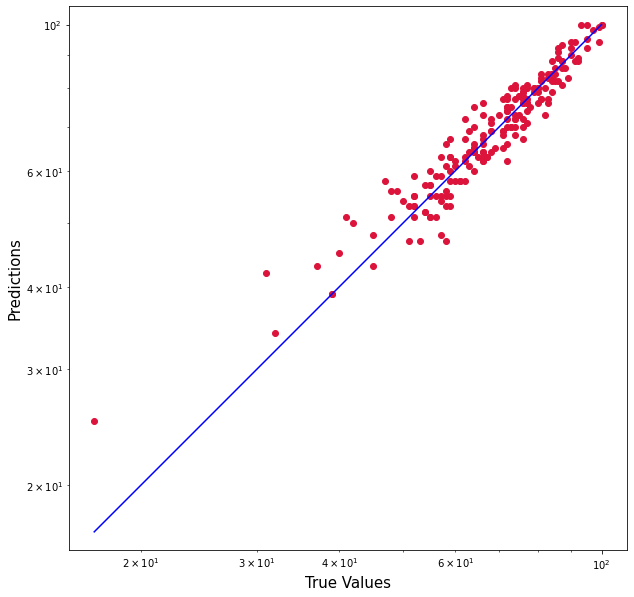

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()